# `clust-learn` - Module 1: Data Preprocessing 数据预处理

Results from ML models are only as good as the data they are trained on. This is the reason why data preprocessing is essential to obtain robust and reliable results. 

机器学习模型的成果仅与它们训练的数据的好有关。这就是为什么数据预处理对于获得稳健和可靠的结果至关重要。

This guide shows you how to use the `data_preprocessing` module of the `clust-learn` package to perform missing data assessment and imputation, and outlier detection.

本指南向您展示如何使用 `clust-learn` 包中的 `data_preprocessing` 模块进行缺失数据评估和插补，以及异常值检测。

## 0. Setup

In [60]:
import numpy as np
import pandas as pd

from clearn.data_preprocessing import *

pd.set_option('display.max_columns', None)

## 1. Data loading

In [61]:
# 344: FutureWarning: Index.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
#   return method()
# 因为IPython在显示索引时使用了即将被弃用的format方法
# 如果您想继续使用当前版本，并且只是想禁用这个警告，可以在代码中添加以下行来忽略特定的FutureWarning：
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# df = pd.read_csv('data/pisa_spain_sample_v2.csv')
df = pd.read_csv('data2/ATG_modified.csv')


df.head()
# print(df.head().to_string(index=False))  # 前五行
# print(df.to_string(index=False))

,IDCNTRY,IDPOP,IDGRADER,IDGRADE,IDSCHOOL,IDTEACH,IDLINK,IDTEALIN,ITLANG_TQ,LCID_TQ,ISDUMMY,ATBG01,ATBG02,ATBG03,ATBG04,ATBG05AA,ATBG05AB,ATBG05AC,ATBG05AD,ATBG05BA,ATBG05BB,ATBG05BC,ATBG05BD,ATBG05BE,ATBG05BF,ATBG05BG,ATBG05BH,ATBG05BI,ATBG05BJ,ATBG05BK,ATBG06,ATBG07AA,ATBG07BA,ATBG07AB,ATBG07BB,ATBG07AC,ATBG07BC,ATBG07AD,ATBG07BD,ATBG07AE,ATBG07BE,ATBG07AF,ATBG07BF,ATBG07AG,ATBG07BG,ATBG08A,ATBG08B,ATBG08C,ATBG08D,ATBG08E,ATBG09A,ATBG09B,ATBG09C,ATBG09D,ATBG10A,ATBG10B,ATBG10C,ATBG10D,ATBG10E,ATBG10F,ATBG10G,ATBG10H,ATBG10I,ATBG10J,ATBG10K,ATBG10L,ATBG11A,ATBG11B,ATBG11C,ATBG11D,ATBG11E,ATBG11F,ATBG11G,ATBG11H,ATBG11I,ATBG12A,ATBG12B,ATBG12C,ATBG12D,ATBG12E,ATBG12F,ATBR01A,ATBR01B,ATBR02A,ATBR02B,ATBR03A,ATBR03B,ATBR03C,ATBR03D,ATBR03E,ATBR03F,ATBR03G,ATBR03H,ATBR04,ATBR05,ATBR06A,ATBR06B,ATBR06C,ATBR06D,ATBR06E,ATBR07AA,ATBR07AB,ATBR07AC,ATBR07AD,ATBR07BA,ATBR07BB,ATBR07BC,ATBR07BD,ATBR08A,ATBR08B,ATBR08C,ATBR08D,ATBR08E,ATBR08F,ATBR08G,ATBR08H,ATBR09A,ATBR09B,ATBR09C,ATBR09D,ATBR09E,ATBR09F,ATBR09G,ATBR09H,ATBR09I,ATBR10A,ATBR10B,ATBR10C,ATBR10D,ATBR10E,ATBR10F,ATBR10G,ATBR10H,ATBR10I,ATBR10J,ATBR10K,ATBR10L,ATBR11A,ATBR11B,ATBR11C,ATBR11D,ATBR11E,ATBR12A,ATBR12BA,ATBR12BB,ATBR12BC,ATBR12BD,ATBR12C,ATBR12DA,ATBR12DB,ATBR12DC,ATBR12EA,ATBR12EB,ATBR12EC,ATBR12ED,ATBR12EE,ATBR13A,ATBR13B,ATBR13C,ATBR13D,ATBR13E,ATBR14,ATBR15,ATBR16,ATBR17A,ATBR17B,ATBR17C,ATBR18A,ATBR18B,ATBR18C,ATBR18D,ATBR18E,ATBR19,ATBGEAS,ATDGEAS,ATBGSOS,ATDGSOS,ATBGTJS,ATDGTJS,ATBGSLI,ATDGSLI,ATDGLIHY,ATDGRIHY,VERSION,SCOPE,LINK_index
0,446,1,2,4,5001,500101,1,50010101,10.0,5124.0,0,32.0,1.0,5.0,4.0,1.0,2.0,2.0,1.0,3.0,2.0,3.0,3.0,2.0,3.0,2.0,2.0,2.0,3.0,2.0,3.0,1.0,1.0,2.0,1.0,2.0,1.0,2.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,2.0,3.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,3.0,3.0,3.0,3.0,2.0,3.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,34.0,34.0,1.0,8.0,2.0,1.0,2.0,2.0,1.0,2.0,1.0,2.0,280.0,90.0,2.0,4.0,4.0,3.0,2.0,1.0,3.0,4.0,2.0,1.0,3.0,3.0,3.0,2.0,2.0,2.0,2.0,2.0,3.0,3.0,3.0,1.0,3.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,3.0,2.0,3.0,3.0,3.0,2.0,2.0,3.0,3.0,4.0,2.0,2.0,2.0,2.0,2.0,4.0,3.0,3.0,3.0,4.0,4.0,4.0,4.0,4.0,1.0,3.0,3.0,1.0,1.0,4.0,5.0,3.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0,1.0,5.0,9.44107,2.0,13.68150,1.0,8.67953,2.0,10.27928,2.0,182.0,58.50000,7,1,44650015001011500101014
1,446,1,2,4,5001,500102,2,50010202,10.0,5124.0,0,7.0,1.0,2.0,5.0,1.0,2.0,2.0,2.0,3.0,2.0,3.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,3.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,1.0,2.0,2.0,2.0,3.0,2.0,3.0,4.0,3.0,3.0,3.0,5.0,5.0,5.0,3.0,4.0,4.0,3.0,2.0,1.0,2.0,2.0,2.0,3.0,4.0,3.0,3.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,34.0,34.0,7.0,8.0,2.0,2.0,1.0,1.0,2.0,3.0,2.0,2.0,240.0,120.0,2.0,4.0,3.0,3.0,2.0,3.0,3.0,4.0,3.0,1.0,4.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,2.0,4.0,4.0,3.0,3.0,2.0,2.0,2.0,3.0,3.0,1.0,3.0,1.0,2.0,1.0,2.0,4.0,1.0,2.0,4.0,3.0,4.0,4.0,4.0,4.0,1.0,3.0,3.0,4.0,2.0,2.0,2.0,2.0,2.0,4.0,3.0,3.0,3.0,4.0,4.0,4.0,4.0,4.0,1.0,4.0,4.0,1.0,1.0,4.0,2.0,3.0,3.0,1.0,1.0,1.0,2.0,2.0,3.0,2.0,5.0,5.59410,3.0,7.18418,2.0,9.82876,2.0,9.10220,2.0,156.0,78.00000,7,1,44650015001022500102024
2,446,1,2,4,5001,500103,3,50010303,10.0,5124.0,0,26.0,1.0,5.0,4.0,1.0,2.0,2.0,1.0,3.0,3.0,3.0,3.0,2.0,3.0,3.0,3.0,3.0,2.0,3.0,1.0,1.0,1.0,1.0,3.0,1.0,2.0,1.0,2.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,2.0,2.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,3.0,2.0,4.0,2.0,3.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,2.0,2.0,2.0,2.0,3.0,2.0,25.0,25.0,1.0,8.0,2.0,1.0,2.0,1.0,2.0,2.0,1.0,1.0,280.0,60.0,3.0,3.0,2.0,2.0,2.0,1.0,2.0,3.0,4.0,3.0,3.0,1.0,2.0,1.0,1.0,2.0,1.0,1.0,2.0,3.0,3.0,2.0,2.0,2.0,2.0,2.0,4.0,2.0,3.0,3.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,4.0,3.0,3.0,3.0,4.0,4.0,4.0,4.0,4.0,1.0,4.0,4.0,1.0,1.0,3.0,3.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,5.0,9.44107,2.0,11.59162,1.0,8.01840,2.0,10.90415,1.0,182.0,39.00000,7,1,44650015001033500103034
3,446,1,2,4,5002,500201,1,50020101,1.0,10333.0,0,7.0,1.0,2.0,5.0,1.0,2.0,1.0,2.0,3

In [62]:
df.shape

(414, 186)

We separate numerical and categorical variables.

我们分离数值型变量和分类变量。

In [ ]:
num_vars = ['ATBG01', 'ATBR01A', 'ATBR01B', 'ATBR02A', 'ATBR02B', 'ATBR04', 'ATBR05',
             'ATBGEAS', 'ATBGSOS', 'ATBGTJS', 'ATBGSLI', 'ATDGLIHY', 'ATDGRIHY']
cat_vars = ["ITLANG_TQ","LCID_TQ","ATBG02","ATBG03","ATBG04",
            "ATBG05AA","ATBG05AB","ATBG05AC","ATBG05AD","ATBG05BA","ATBG05BB",
            "ATBG05BC","ATBG05BD","ATBG05BE","ATBG05BF","ATBG05BG","ATBG05BH",
            "ATBG05BI","ATBG05BJ","ATBG05BK","ATBG06","ATBG07AA","ATBG07BA",
            "ATBG07AB","ATBG07BB","ATBG07AC","ATBG07BC","ATBG07AD","ATBG07BD",
            "ATBG07AE","ATBG07BE","ATBG07AF","ATBG07BF","ATBG07AG","ATBG07BG",
            "ATBG08A","ATBG08B","ATBG08C","ATBG08D","ATBG08E","ATBG09A","ATBG09B",
            "ATBG09C","ATBG09D","ATBG10A","ATBG10B","ATBG10C","ATBG10D","ATBG10E",
            "ATBG10F","ATBG10G","ATBG10H","ATBG10I","ATBG10J","ATBG10K","ATBG10L",
            "ATBG11A","ATBG11B","ATBG11C","ATBG11D","ATBG11E","ATBG11F","ATBG11G",
            "ATBG11H","ATBG11I","ATBG12A","ATBG12B","ATBG12C","ATBG12D","ATBG12E",
            "ATBG12F","ATBR03A","ATBR03B","ATBR03C","ATBR03D","ATBR03E","ATBR03F",
            "ATBR03G","ATBR03H","ATBR06A","ATBR06B","ATBR06C","ATBR06D","ATBR06E",
            "ATBR07AA","ATBR07AB","ATBR07AC","ATBR07AD","ATBR07BA","ATBR07BB",
            "ATBR07BC","ATBR07BD","ATBR08A","ATBR08B","ATBR08C","ATBR08D","ATBR08E",
            "ATBR08F","ATBR08G","ATBR08H","ATBR09A","ATBR09B","ATBR09C","ATBR09D",
            "ATBR09E","ATBR09F","ATBR09G","ATBR09H","ATBR09I","ATBR10A","ATBR10B",
            "ATBR10C","ATBR10D","ATBR10E","ATBR10F","ATBR10G","ATBR10H","ATBR10I",
            "ATBR10J","ATBR10K","ATBR10L","ATBR11A","ATBR11B","ATBR11C","ATBR11D",
            "ATBR11E","ATBR12A","ATBR12BA","ATBR12BB","ATBR12BC","ATBR12BD","ATBR12C",
            "ATBR12DA","ATBR12DB","ATBR12DC","ATBR12EA","ATBR12EB","ATBR12EC",
            "ATBR12ED","ATBR12EE","ATBR13A","ATBR13B","ATBR13C","ATBR13D","ATBR13E",
            "ATBR14","ATBR15","ATBR16","ATBR17A","ATBR17B","ATBR17C","ATBR18A","ATBR18B",
            "ATBR18C","ATBR18D","ATBR18E","ATBR19","ATDGEAS","ATDGSOS","ATDGTJS","ATDGSLI"]

In [64]:
columns_to_extract = ["LINK_index","ITLANG_TQ","LCID_TQ","ATBG01","ATBG02","ATBG03","ATBG04",
                    "ATBG05AA","ATBG05AB","ATBG05AC","ATBG05AD","ATBG05BA","ATBG05BB","ATBG05BC","ATBG05BD",
                    "ATBG05BE","ATBG05BF","ATBG05BG","ATBG05BH","ATBG05BI","ATBG05BJ","ATBG05BK","ATBG06",
                    "ATBG07AA","ATBG07BA","ATBG07AB","ATBG07BB","ATBG07AC","ATBG07BC","ATBG07AD","ATBG07BD",
                    "ATBG07AE","ATBG07BE","ATBG07AF","ATBG07BF","ATBG07AG","ATBG07BG","ATBG08A","ATBG08B",
                    "ATBG08C","ATBG08D","ATBG08E","ATBG09A","ATBG09B","ATBG09C","ATBG09D","ATBG10A","ATBG10B",
                    "ATBG10C","ATBG10D","ATBG10E","ATBG10F","ATBG10G","ATBG10H","ATBG10I","ATBG10J","ATBG10K",
                    "ATBG10L","ATBG11A","ATBG11B","ATBG11C","ATBG11D","ATBG11E","ATBG11F","ATBG11G","ATBG11H",
                    "ATBG11I","ATBG12A","ATBG12B","ATBG12C","ATBG12D","ATBG12E","ATBG12F","ATBR01A","ATBR01B",
                    "ATBR02A","ATBR02B","ATBR03A","ATBR03B","ATBR03C","ATBR03D","ATBR03E","ATBR03F","ATBR03G",
                    "ATBR03H","ATBR04","ATBR05","ATBR06A","ATBR06B","ATBR06C","ATBR06D","ATBR06E","ATBR07AA",
                    "ATBR07AB","ATBR07AC","ATBR07AD","ATBR07BA","ATBR07BB","ATBR07BC","ATBR07BD","ATBR08A",
                    "ATBR08B","ATBR08C","ATBR08D","ATBR08E","ATBR08F","ATBR08G","ATBR08H","ATBR09A","ATBR09B",
                    "ATBR09C","ATBR09D","ATBR09E","ATBR09F","ATBR09G","ATBR09H","ATBR09I","ATBR10A","ATBR10B",
                    "ATBR10C","ATBR10D","ATBR10E","ATBR10F","ATBR10G","ATBR10H","ATBR10I","ATBR10J","ATBR10K",
                    "ATBR10L","ATBR11A","ATBR11B","ATBR11C","ATBR11D","ATBR11E","ATBR12A","ATBR12BA","ATBR12BB",
                    "ATBR12BC","ATBR12BD","ATBR12C","ATBR12DA","ATBR12DB","ATBR12DC","ATBR12EA","ATBR12EB",
                    "ATBR12EC","ATBR12ED","ATBR12EE","ATBR13A","ATBR13B","ATBR13C","ATBR13D","ATBR13E","ATBR14",
                    "ATBR15","ATBR16","ATBR17A","ATBR17B","ATBR17C","ATBR18A","ATBR18B","ATBR18C","ATBR18D",
                    "ATBR18E","ATBR19","ATBGEAS","ATDGEAS","ATBGSOS","ATDGSOS","ATBGTJS","ATDGTJS","ATBGSLI",
                    "ATDGSLI","ATDGLIHY","ATDGRIHY"]
# 提取指定的列，组成新的 DataFrame
df = df[columns_to_extract]

# 移除方差为零的数值变量
num_vars_filtered = [var for var in num_vars if df[var].var() > 0]
# 更新 num_vars 并筛选 DataFrame
num_vars = num_vars_filtered  # 确保后续步骤使用过滤后的变量列表

# 移除分类变量中唯一值总数小于2的分类变量 和 方差为零的分类变量
cat_vars_filtered = [var for var in cat_vars if df[var].nunique() >= 2 and df[var].var() > 0]
# 添加额外检查：删除唯一值数量为1的变量
cat_vars_filtered = [var for var in cat_vars_filtered if df[var].nunique() > 1]
# 更新 num_vars 并筛选 DataFrame
cat_vars = cat_vars_filtered  # 确保后续步骤使用过滤后的变量列表
# print(df[cat_vars].nunique())

# 打印数值变量和分类变量
print('数值变量:', len(num_vars), num_vars)
print('分类变量:', len(cat_vars), cat_vars)

# 提取指定的列，组成新的 DataFrame
columns_to_extract = ["LINK_index"] + num_vars + cat_vars
df = df[columns_to_extract]

数值变量: 13 ['ATBG01', 'ATBR01A', 'ATBR01B', 'ATBR02A', 'ATBR02B', 'ATBR04', 'ATBR05', 'ATBGEAS', 'ATBGSOS', 'ATBGTJS', 'ATBGSLI', 'ATDGLIHY', 'ATDGRIHY']
分类变量: 161 ['ITLANG_TQ', 'LCID_TQ', 'ATBG02', 'ATBG03', 'ATBG04', 'ATBG05AA', 'ATBG05AB', 'ATBG05AC', 'ATBG05AD', 'ATBG05BA', 'ATBG05BB', 'ATBG05BC', 'ATBG05BD', 'ATBG05BE', 'ATBG05BF', 'ATBG05BG', 'ATBG05BH', 'ATBG05BI', 'ATBG05BJ', 'ATBG05BK', 'ATBG06', 'ATBG07AA', 'ATBG07BA', 'ATBG07AB', 'ATBG07BB', 'ATBG07AC', 'ATBG07BC', 'ATBG07AD', 'ATBG07BD', 'ATBG07AE', 'ATBG07BE', 'ATBG07AF', 'ATBG07BF', 'ATBG07AG', 'ATBG07BG', 'ATBG08A', 'ATBG08B', 'ATBG08C', 'ATBG08D', 'ATBG08E', 'ATBG09A', 'ATBG09B', 'ATBG09C', 'ATBG09D', 'ATBG10A', 'ATBG10B', 'ATBG10C', 'ATBG10D', 'ATBG10E', 'ATBG10F', 'ATBG10G', 'ATBG10H', 'ATBG10I', 'ATBG10J', 'ATBG10K', 'ATBG10L', 'ATBG11A', 'ATBG11B', 'ATBG11C', 'ATBG11D', 'ATBG11E', 'ATBG11F', 'ATBG11G', 'ATBG11H', 'ATBG11I', 'ATBG12A', 'ATBG12B', 'ATBG12C', 'ATBG12D', 'ATBG12E', 'ATBG12F', 'ATBR03A', 'ATBR03B', 'ATBR03

## 3. Data preprocessing

### 3.1. Missing values

#### 3.1.1. Missung value assessment 缺失值评估

In [65]:
n_missing = df.isnull().sum().sum()
print('Missing values:', n_missing, f'({n_missing*100/df.size}%)')

Missing values: 973 (1.3429951690821256%)


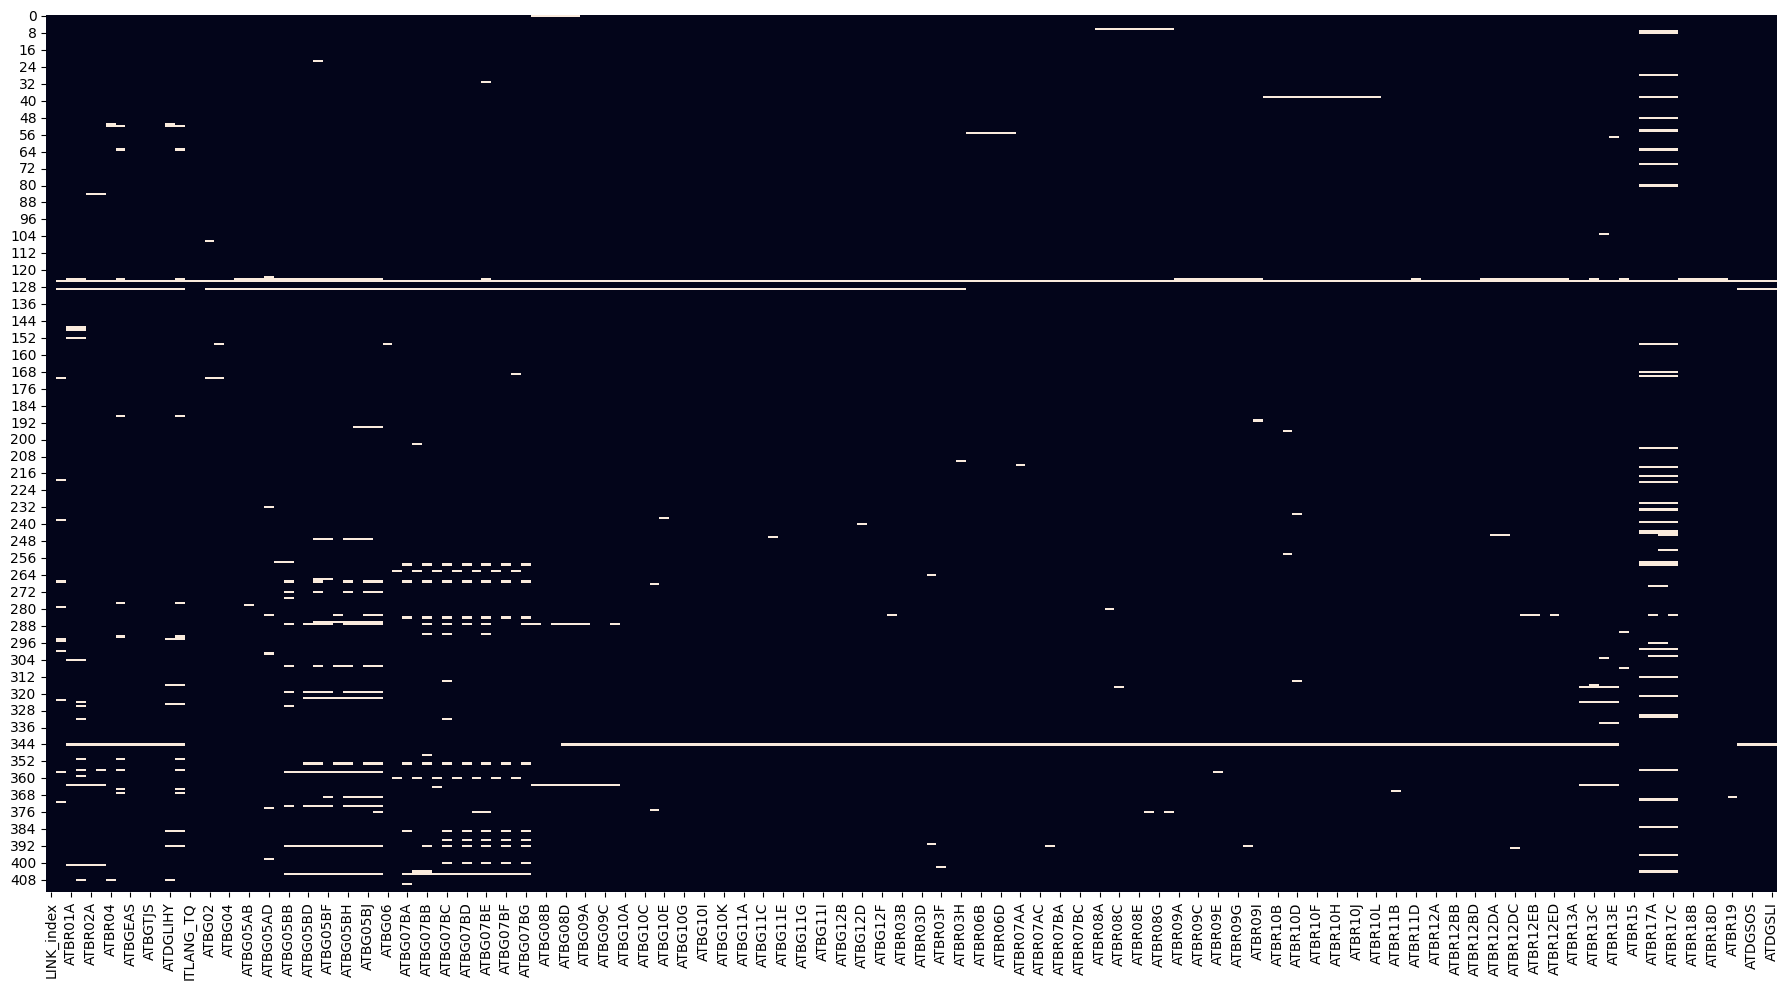

In [66]:
missing_values_heatmap(df) #, output_path='PATH.jpg')

In [67]:
compute_missing(df).head(10)

,var_name,missing
163,ATBR17B,9.420290
162,ATBR17A,9.178744
164,ATBR17C,9.178744
161,ATBR16,8.212560
33,ATBG05BK,4.589372
32,ATBG05BJ,4.589372
13,ATDGRIHY,4.347826
27,ATBG05BE,4.347826
30,ATBG05BH,4.106280
3,ATBR01B,4.106280


In [68]:
compute_missing(df[num_vars+cat_vars]).describe()

,missing
count,174.000000
mean,1.350714
std,1.500724
min,0.241546
25%,0.724638
50%,0.724638
75%,1.207729
max,9.420290


In [69]:
print(compute_missing(df[num_vars+cat_vars]).describe())

          missing
count  174.000000
mean     1.350714
std      1.500724
min      0.241546
25%      0.724638
50%      0.724638
75%      1.207729
max      9.420290


#### 3.1.2. Data imputation. Easy approach  数据插补。简单的方法

We use the function `impute_missing_values()` that implements all steps of the data imputation methodology in a single call.

我们使用函数 'impute_missing_values（）' 在一次调用中实现数据插补方法的所有步骤。

In [70]:
# Note this is essential for reproducibility. Restart kernel every time you run the analysis for getting same results
# 请注意，这对于可重复性至关重要。每次运行分析时重新启动内核以获得相同的结果
np.random.seed(42)

In [71]:
df_imp = impute_missing_values(df, num_vars=num_vars, cat_vars=cat_vars)

--- One-to-one model based imputation for strongly related variables ---
Imputing with empirical discrete distribution LCID_TQ -> ATBR01A
Imputing with empirical discrete distribution LCID_TQ -> ATBR01B
Imputing with empirical discrete distribution ATBGEAS -> ATBG10E
Imputing with empirical discrete distribution ATBGSOS -> ATBG11D
Imputing with empirical discrete distribution ATBGTJS -> ATBG12D
Imputing with empirical discrete distribution ATBGSLI -> ATBR03A
Imputing with empirical discrete distribution ATBGSLI -> ATBR03F
Imputing with empirical discrete distribution ATBGSLI -> ATBR03H
Imputing with empirical discrete distribution ATBGEAS -> ATBG10D
Imputing with empirical discrete distribution ATBGSLI -> ATBR03E
Imputing with empirical discrete distribution ATBR03H -> ATBR02B
Imputing with empirical discrete distribution ATBG03 -> ATBG01
Imputing with linear regression ATBR04 -> ATDGLIHY
Imputing with linear regression ATBR05 -> ATDGRIHY
--- Cluster based hot deck imputation ---
Parti

Let's now check that all values have been imputed and that the resulting variable distributions after imputation look similar to the original ones.

现在，我们检查一下是否所有值都已插补，以及插补后生成的变量分布是否与原始分布相似。

In [72]:
compute_missing(df_imp)

,var_name,missing
0,LINK_index,0.0
1,ATBG01,0.0
2,ATBR01A,0.0
3,ATBR01B,0.0
4,ATBR02A,0.0
...,...,...
170,ATBR19,0.0
171,ATDGEAS,0.0
172,ATDGSOS,0.0
173,ATDGTJS,0.0


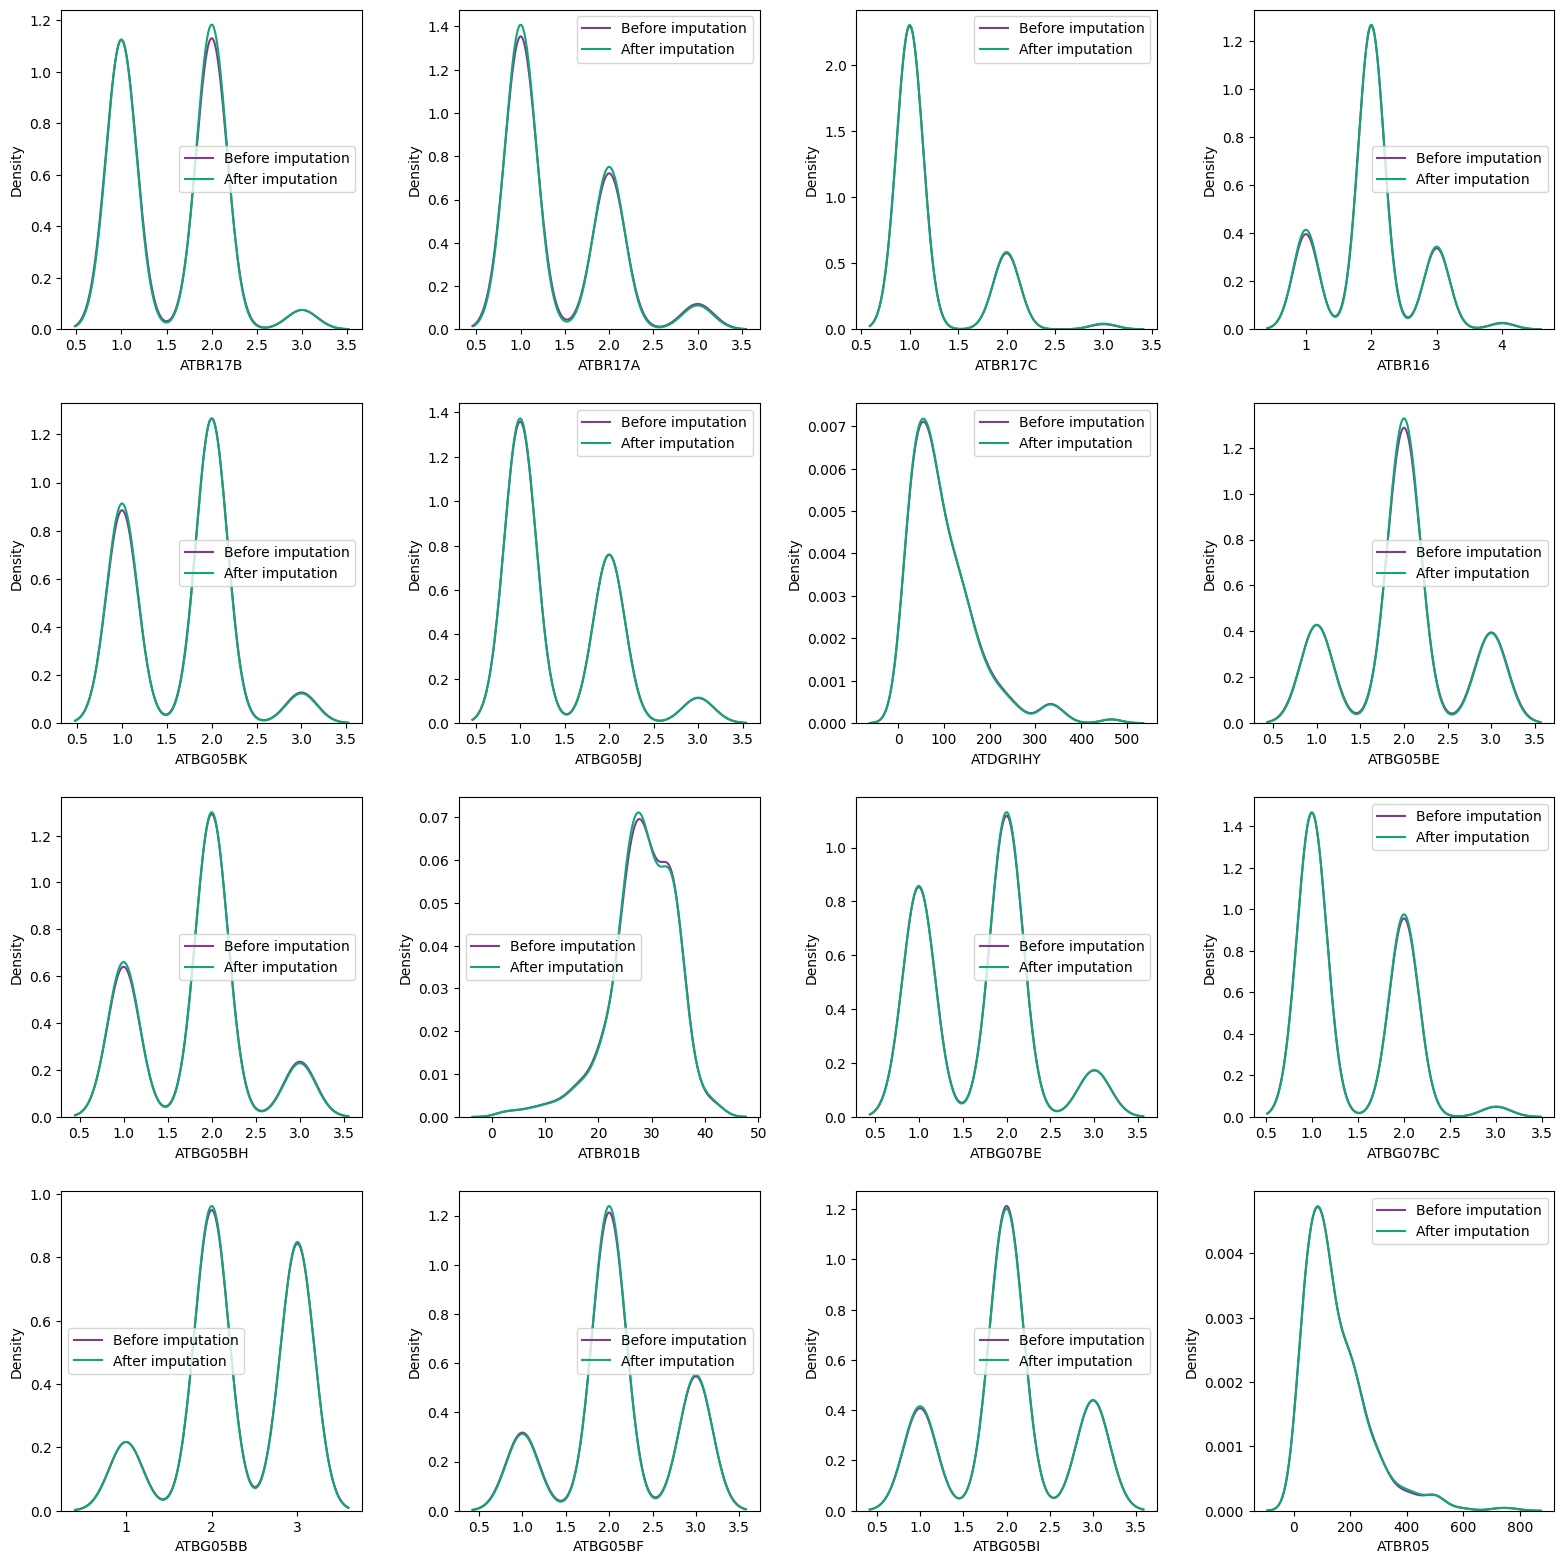

In [73]:
plot_imputation_distribution_assessment(df.loc[df_imp.index], df_imp, list(compute_missing(df).head(16)['var_name']))

Save the data frame with imputed values.
使用插补值保存数据框。

In [74]:

# imputation_output 插补值
df_imp.to_csv('data2/ATG_modified_imputation_output.csv', index=False)

### 3.2. Outlier detection 异常值检测

In [75]:
clean, outliers = remove_outliers(df_imp, num_vars+cat_vars)

In [76]:
# 清理异常值
clean.to_csv('data2/ATG_modified_preprocess_ouput.csv', index=False)
outliers.to_csv('data2/ATG_modified_outliers_output.csv', index=False)

In [77]:
print(df.shape, '>>', df.isnull().sum().sum())
print(df_imp.shape, '>>', df_imp.isnull().sum().sum())
print(clean.shape, '>>', clean.isnull().sum().sum())

(414, 175) >> 973
(411, 175) >> 0
(330, 175) >> 0


## 4. Reproducibility check 可重复性检查

In this section, we check that for the same `numpy` seed, results are reproducible.

在本节中，我们检查对于相同的 'numpy' 种子，结果是可重现的。

### 4.1. Imputation 插补

In [78]:
# 识别非数值列

df_imp_ref = pd.read_csv('data2/ATG_modified_imputation_output.csv')
# 检查 df_imp_ref 的列类型
print(df_imp_ref.dtypes)

# 检查 df_imp 的列类型（假设 df_imp 已定义）
print(df_imp.dtypes)

# 尝试将非数值列转换为数值类型
df_imp_ref = df_imp_ref.apply(pd.to_numeric, errors='coerce')
df_imp = df_imp.apply(pd.to_numeric, errors='coerce')

LINK_index     object
ATBG01        float64
ATBR01A       float64
ATBR01B       float64
ATBR02A       float64
               ...   
ATBR19        float64
ATDGEAS       float64
ATDGSOS       float64
ATDGTJS       float64
ATDGSLI       float64
Length: 175, dtype: object
LINK_index     object
ATBG01        float64
ATBR01A       float64
ATBR01B       float64
ATBR02A       float64
               ...   
ATBR19        float64
ATDGEAS       float64
ATDGSOS       float64
ATDGTJS       float64
ATDGSLI       float64
Length: 175, dtype: object


In [79]:
check_df = df_imp_ref.mean().to_frame(name='reference').merge(df_imp.mean().to_frame(name='current_run'), left_index=True, right_index=True)
check_df['diff'] = np.abs(check_df['reference'] - check_df['current_run']) > 1e-6
print('Diff', check_df['diff'].sum())

Diff 0


### 4.2. Complete preprocessing process 完整的预处理过程

In [80]:
# 识别非数值列

clean_ref = pd.read_csv('data2/ATG_modified_preprocess_ouput.csv')
# 检查 df_imp_ref 的列类型
print(clean_ref.dtypes)

# 检查 df_imp 的列类型（假设 df_imp 已定义）
print(clean.dtypes)

# 尝试将非数值列转换为数值类型
clean_ref = clean_ref.apply(pd.to_numeric, errors='coerce')
clean = clean.apply(pd.to_numeric, errors='coerce')

LINK_index     object
ATBG01        float64
ATBR01A       float64
ATBR01B       float64
ATBR02A       float64
               ...   
ATBR19        float64
ATDGEAS       float64
ATDGSOS       float64
ATDGTJS       float64
ATDGSLI       float64
Length: 175, dtype: object
LINK_index     object
ATBG01        float64
ATBR01A       float64
ATBR01B       float64
ATBR02A       float64
               ...   
ATBR19        float64
ATDGEAS       float64
ATDGSOS       float64
ATDGTJS       float64
ATDGSLI       float64
Length: 175, dtype: object


In [81]:

check_df = clean_ref.mean().to_frame(name='reference').merge(clean.mean().to_frame(name='current_run'), left_index=True, right_index=True)
check_df['diff'] = np.abs(check_df['reference'] - check_df['current_run']) > 1e-6
print('Diff', check_df['diff'].sum())

Diff 0
